---
title: TP - Implémentation des graphes par liste d'adjacence
---

On considère un graphe $G$ dont les sommets sont les entiers de $0$ à $n-1$ et les arêtes sont les couples d'entiers $(i,j)$ avec $0\leq i,j\leq n-1$.

L'objectif de ce TP est d'implémenter les graphes en python par liste d'adjacence.

**On considère ici que les graphes sont non orientés.**

## 1. Implémentation objet

Créer une classe `Graph` qui permet de représenter un graphe par liste d'adjacence.

La classe `Graph` doit contenir les attributs suivants :

  * `order` : le nombre de sommets du graphe
  * `liste` : une liste de listes d'entiers représentant la liste d'adjacence du graphe

La classe `Graph` doit contenir les méthodes suivantes :

* `__init__` : initialise un graphe vide de taille `order`
* `add_edge` : ajoute l'arête $(i,j)$ au graphe
* `remove_edge` : supprime l'arête $(i,j)$ du graphe
* `add_vertex` : ajoute un sommet au graphe
* `remove_vertex` : supprime le sommet `i` du graphe
* `is_adjacent` : retourne `True` si les sommets `i` et `j` sont adjacents, `False` sinon
* `neighbors` : retourne la liste des voisins du sommet `i`
* `degree` : retourne le degré du sommet `i`
* `__str__` : retourne une chaîne de caractères représentant le graphe (afficher sur chaque ligne le numéro du sommet suivi de la liste de ses voisins)
* `draw` : dessine le graphe (s'inspirer du TP précédent !)

In [3]:
import networkx as nx

class Graph:

    def __init__(self, n):
        self.order = n
        self.liste = [[] for i in range(n)]

    def add_edge(self, u, v):
        self.liste[u].append(v)
        self.liste[v].append(u)
    
    def remove_edge(self, u, v):
        self.liste[u].remove(v)
        self.liste[v].remove(u)
    
    def add_vertex(self):
        self.liste.append([])
        self.order += 1
    
    def remove_vertex(self, u):
        for v in self.liste[u]:
            self.liste[v].remove(u)
        self.liste.pop(u)
        self.order -= 1
    
    def is_adjacent(self, u, v):
        return v in self.liste[u]
    
    def neighbors(self, u):
        return self.liste[u]
    
    def degree(self, u):
        return len(self.liste[u])
    
    def __str__(self):
        rep = ""
        for i in range(self.order):
            rep += str(i) + " : " + str(self.liste[i]) + "\n"
        return rep
    
    def draw(self):
        G = nx.Graph()
        G.add_nodes_from(range(self.order))
        for i in range(self.order):
            for j in self.liste[i]:
                G.add_edge(i, j)
        nx.draw(G, with_labels=True, node_color='white', font_size=18, edgecolors='black', node_size=500)

0 : [3]
1 : [2, 4]
2 : [1, 3, 4]
3 : [0, 2, 4]
4 : [1, 2, 3]



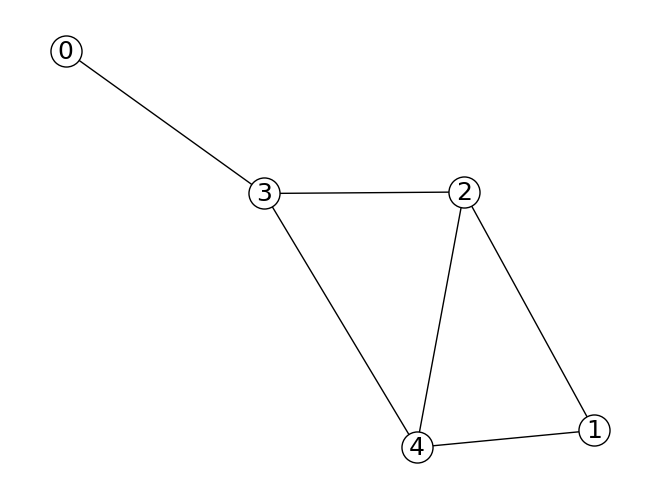

In [5]:
# Exemple d'utilisation

g = Graph(5)
g.add_edge(0, 3)
g.add_edge(1, 2)
g.add_edge(1, 4)
g.add_edge(2, 3)
g.add_edge(2, 4)
g.add_edge(3, 4)
print(g)
g.draw()

## Passage d'une représentation à l'autre

On considère un graphe $G$ représenté par liste d'adjacence. On souhaite passer à une représentation par matrice d'adjacence.

Compléter la fonction `list_to_matrix` qui prend en paramètre une liste d'adjacence d'un graphe `G` et retourne la matrice d'adjacence représentant le graphe.

In [6]:
def list_to_matrix(liste):
    n = len(liste)
    mat = [[0 for i in range(n)] for j in range(n)]
    for i in range(n):
        for j in liste[i]:
            mat[i][j] = 1
            mat[j][i] = 1
    return mat

In [7]:
# Test de la fonction list_to_matrix
matrice = list_to_matrix(g.liste)
assert matrice == [[0, 0, 0, 1, 0], [0, 0, 1, 0, 1], [0, 1, 0, 1, 1], [1, 0, 1, 0, 1], [0, 1, 1, 1, 0]]
print("Test réussi !")

Test réussi !


Opération inverse : compléter la fonction `matrix_to_list` qui prend en paramètre une matrice d'adjacence d'un graphe `G` et retourne la liste d'adjacence représentant le graphe.

In [8]:
def matrix_to_list(matrice):
    n = len(matrice)
    liste = [[] for i in range(n)]
    for i in range(n):
        for j in range(n):
            if matrice[i][j] == 1:
                liste[i].append(j)
    return liste

In [9]:
# Test de la fonction matrix_to_list
liste = matrix_to_list(matrice)
assert liste == [[3], [2, 4], [1, 3, 4], [0, 2, 4], [1, 2, 3]]
print("Test réussi !")

Test réussi !
